# 영화 '나를 찾아줘' 평가

## 한줄평 및 평점 추이 분석

In [151]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

plt.rcParams['axes.unicode_minus']=False

from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

from tqdm import tqdm_notebook

import nltk
from konlpy.tag import Twitter; t = Twitter()

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [154]:
tmp = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=175324&type=after&onlyActualPointYn=N"
html = tmp + "&onlySpoilerPointYn=N&order=sympathyScore&page={page}"

ment_bringMeOn = []

for n in tqdm_notebook(range(1,1000,10)):
    response = urlopen(html.format(page=n))
    
    soup = BeautifulSoup(response, "html.parser")
    
    tmp = soup.find_all('div', 'score_reple')
    
    for line in tmp :
        ment_bringMeOn.append(line.text)
    
    time.sleep(0.5)


In [155]:
ment = ""
for each_line in ment_bringMeOn[:1000]:
    ment = ment+each_line+'\n'


In [156]:
tokens_ko = t.morphs(ment)
tokens_ko

['\n\n\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t  ',
 '악',
 '은',
 '특별하지',
 '않다',
 '.',
 '어린',
 '아이',
 '들',
 '의',
 '도',
 '넘은',
 '장난',
 '전화',
 ',',
 '친척',
 '과의',
 '식사',
 '자리',
 ',',
 '전단지',
 '를',
 '내팽겨',
 '치고',
 '낚싯줄',
 '을',
 '당기는',
 '낚시꾼',
 '.',
 '악',
 '은',
 '이미',
 '우리',
 '일상',
 '에',
 '뿌리',
 '내려져',
 '있다',
 '.',
 '극',
 '중',
 '에서',
 '만선',
 '낚시터',
 '사람',
 '들',
 '의',
 '모습',
 '은',
 '우리',
 '의',
 '평상시',
 '...',
 '\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\n\n\n\n\n\n',
 'strauss',
 '1870',
 '(',
 'bhy',
 '1',
 '****)',
 '\n\n\n',
 '2019.11',
 '.',
 '27',
 '19:55',
 '\n\n\n',
 '신고',
 '\n\n\n\n\n\n\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
 '영화',
 '가',
 '재미있다거나',
 '박진',
 '감',
 '넘친다거나',
 '를',
 '떠나서',
 '살면서',
 '꼭',
 '한번',
 '씩',
 '보고',
 '아이',
 '를',
 '잃어버린',
 '가족',
 '들',
 '의',
 '마음',
 '을',
 '한순간',
 '이라도',
 '공감',
 '했으면',
 '하는',
 '마음',
 '애',
 '서',
 '만점',
 '줬어요',
 '.',
 '세상',
 '찜찜하고',
 '속',
 '타',
 '는',
 '영화',
 '.',
 '섬',
 '사람',
 '들',
 '이나',
 '지',
 '역차별',
 '한다',
 '선입견',
 '...',
 '\r\n\t\t\t\t\

In [157]:
ko = nltk.Text(tokens_ko, name='나를 찾아줘')
print(len(ko.tokens))
print(len(set(ko.tokens)))

30175
1985


In [148]:
ko = nltk.Text(tokens_ko, name='나를 찾아줘')
ko.vocab().most_common(100)

[('\n\n\n', 824),
 ('.', 748),
 ('신고', 412),
 ('2019.11', 403),
 ('가', 392),
 ('(', 292),
 ('****)', 289),
 ('이', 275),
 ('27', 219),
 ('이영애', 209),
 ('에', 205),
 ('는', 202),
 ('\n\n\n\n\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
  201),
 ('아이', 186),
 ('입니다', 174),
 ('감상', 172),
 ('평', 172),
 ('세월호', 168),
 ('영화', 155),
 ('...', 147),
 ('의', 141),
 ('28', 132),
 ('를', 126),
 ('****', 123),
 ('도', 111),
 ('\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\n\n\n\n\n\n', 103),
 ('\n\n\n\n\n\n', 100),
 ('관람객', 100),
 ('\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
  99),
 ('것', 98),
 ('?', 96),
 ('인', 95),
 ('된', 92),
 ('내', 91),
 ('중', 89),
 ('보기', 89),
 ('0', 88),
 ('모두', 88),
 ('경찰', 87),
 ('짱', 87),
 ('남', 87),
 ('실종', 87),
 ('10:20', 86),
 ('아들', 86),
 ('\n\n\n\n\n\n\n', 86),
 ('스포일러', 86),
 ('포함

In [158]:
stop_words = ['\n\n\n','.','신고','2019.11','(','****)','가','영화','27','이','로','평','...','에','입니다',
'\n\n\n\n\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
'의','는','28','를','은','\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\n\n\n\n\n\n', '10:20','j','ssang','ssan','zmdk','09:37','\n\n', '/', 'jmsu', 
'\n\n\n\n\n\n','관람객','만','한','극','된','보기','스포일러','포함','\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t','MacGyVer','jeep', 'Unbalance',
'제목','분명','베','도','을','****','30','나','?',',','에서','0','그','인','fhg','제','봤다','??','처럼', '봤는데',
'\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
'ㅠㅠ','두','개','것','못','보다','!','남','곳',')','중','ㅋㅋ','\n\n\n\n\n\n\n']
tokens_ko = [each_word for each_word in tokens_ko 
                            if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='나를 찾아줘')
ko.vocab().most_common(100)

[('감상', 338),
 ('사투리', 252),
 ('이영애', 211),
 ('아이', 187),
 ('경찰', 173),
 ('살인', 170),
 ('강간', 169),
 ('견찰', 168),
 ('범', 168),
 ('세월호', 168),
 ('너무', 118),
 ('현실', 94),
 ('내', 93),
 ('최고', 90),
 ('왜', 88),
 ('2', 88),
 ('모두', 87),
 ('대한', 87),
 ('불', 87),
 ('초반', 87),
 ('그렇고', 87),
 ('재미', 86),
 ('굳이', 86),
 ('하려', 86),
 ('사건', 86),
 ('소름', 86),
 ('악인', 86),
 ('가서', 86),
 ('그대로', 86),
 ('실종', 85),
 ('짱', 85),
 ('였음', 85),
 ('윤수', 85),
 ('처음', 85),
 ('자기', 85),
 ('혼자', 85),
 ('아무리', 84),
 ('라지', 84),
 ('패란건좀', 84),
 ('에바', 84),
 ('16:53', 84),
 ('조조', 84),
 ('일', 84),
 ('없어요', 84),
 ('슬퍼요', 84),
 ('릭훈', 84),
 ('외국', 84),
 ('꼈어야', 84),
 ('했나', 84),
 ('???', 84),
 ('껴서', 84),
 ('흥', 84),
 ('한심하다', 84),
 ('14:48', 84),
 ('마리', 84),
 ('전라도', 84),
 ('쓰다가', 84),
 ('다음씬', 84),
 ('바로', 84),
 ('경상도', 84),
 ('충청도', 84),
 ('말투', 84),
 ('세탁', 84),
 ('ㅆㅅㅌㅊ', 84),
 ('초', 84),
 ('주의', 84),
 ('가려다가', 84),
 ('7시', 84),
 ('우라늄', 84),
 ('16:47', 84),
 ('잠든거', 84),
 ('아니죠', 84),
 ('14:59', 84),
 ('알레고리', 8

In [40]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

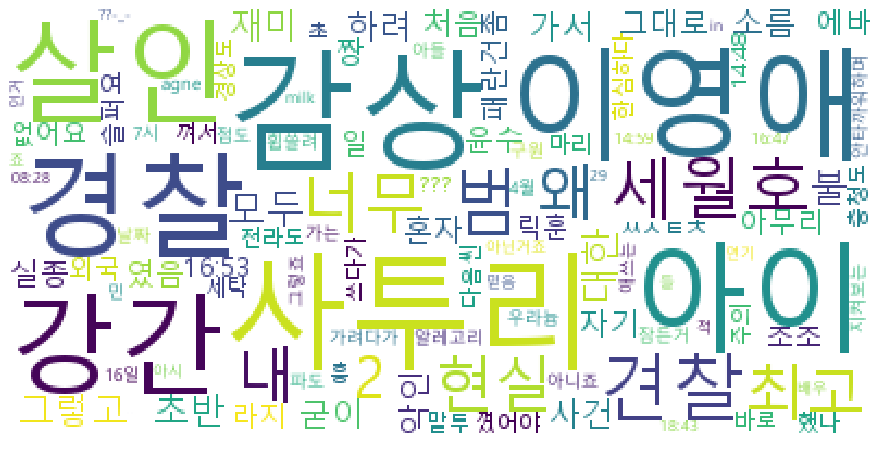

In [159]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [160]:
date = pd.date_range('2019-11-27', periods=4, freq='D')
date

DatetimeIndex(['2019-11-27', '2019-11-28', '2019-11-29', '2019-11-30'], dtype='datetime64[ns]', freq='D')

In [161]:
movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html_bring = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?" +\
                    "sel=cur&tg=0&date={date}"
    response = urlopen(html_bring.format(date = urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
        
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

In [162]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 
                                      'point':movie_point})
movie['point'] = movie['point'].astype(float)

In [163]:
tmp = movie.query('name == ["나를 찾아줘"]')
tmp

,date,name,point
36,2019-11-27,나를 찾아줘,7.89
91,2019-11-28,나를 찾아줘,7.64
141,2019-11-29,나를 찾아줘,7.55
191,2019-11-30,나를 찾아줘,7.45


No handles with labels found to put in legend.


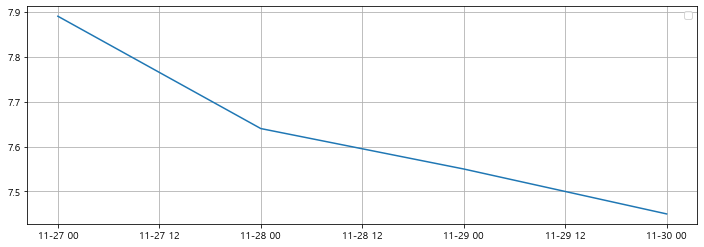

In [164]:
plt.figure(figsize=(12,4))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()